#**AIVLE School 5기 3차 MiniProject Kaggle Competition**
#Dataset Description
라벨 설명
- 1: 걷기
- 2: 뛰기
- 3: 천천히 걷기
- 4: 계단 오르기
- 5: 계단 내려가기
- 6: 서있기
- 7: 앉아있기
- 8: 누워있기
- 9: 자전거 타기
- 10: 서서 자전거 타기
- 11: 자전거에 앉아있기

# Files
- train.csv - the training set
- test.csv - the test set
- sample_submission.csv - a sample submission file in the correct format

#Columns
- timestamp - 측정 시간
- A_x - 신체부위 'A'에 부착된 센서의 x축 데이터
- A_y - 신체부위 'A'에 부착된 센서의 y축 데이터
- A_z - 신체부위 'A'에 부착된 센서의 z축 데이터
- B_x - 신체부위 'B'에 부착된 센서의 x축 데이터
- B_y - 신체부위 'B'에 부착된 센서의 y축 데이터
- B_z - 신체부위 'B'에 부착된 센서의 z축 데이터
- label - 라벨값(1~11)

# 단계1 : 탐색적 데이터 분석

## 1.환경설정

### (1) 라이브러리 불러오기

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

* 변수 중요도 함수 생성
    * 변수 중요도를 시각화할 수 있는 함수를 제공합니다.
    * 입력 :
        * importance : 트리모델의 변수 중요도(예: model.feature_importances_)
        * names : 변수 이름 목록(예 : x_train.columns
        * result_only  : 변수 중요도 순으로 데이터프레임만 return할지, 그래프도 포함할지 결정. False이면 결과 데이터프레임 + 그래프
        * topn : 중요도 상위 n개만 표시. all 이면 전체.
    * 출력 :
        * 중요도 그래프 : 중요도 내림차순으로 정렬
        * 중요도 데이터프레임 : 중요도 내림차순으로 정렬

In [ ]:
# # ★변수의 특성 중요도 계산하기
# def plot_feature_importance(importance, names, result_only = False, topn = 'all'):
#     feature_importance = np.array(importance)
#     feature_name = np.array(names)

#     data={'feature_name':feature_name,'feature_importance':feature_importance}
#     fi_temp = pd.DataFrame(data)

#     #변수의 특성 중요도 순으로 정렬하기
#     fi_temp.sort_values(by=['feature_importance'], ascending=False,inplace=True)
#     fi_temp.reset_index(drop=True, inplace = True)

#     if topn == 'all' :
#         fi_df = fi_temp.copy()
#     else :
#         fi_df = fi_temp.iloc[:topn]

#     #변수의 특성 중요도 그래프로 그리기
#     if result_only == False :
#         plt.figure(figsize=(10,20))
#         sns.barplot(x='feature_importance', y='feature_name', data = fi_df)

#         plt.xlabel('importance')
#         plt.ylabel('feature name')
#         plt.grid()

#     return fi_df

### (2) 데이터 불러오기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/KT Aivle/Mini Project 3/Kaggle/train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/KT Aivle/Mini Project 3/Kaggle/test.csv')
sample_data = pd.read_csv('/content/drive/MyDrive/KT Aivle/Mini Project 3/Kaggle/sample.csv')

## 2.데이터 분석

### (1) 기본정보 확인하기


In [ ]:
data.head(5)

,Unnamed: 0,timestamp,A_x,A_y,A_z,B_x,B_y,B_z,label
0,0,2019-01-12 00:45:54.450,-0.259130,-0.834869,-0.485499,0.196409,NaN,0.384934,8
1,1,2000-01-01 01:37:06.440,0.370490,0.175042,0.122625,-0.338242,0.358245,0.126491,2
2,2,2019-01-12 00:45:33.900,-0.257837,-0.881947,-0.391895,0.196027,0.894537,0.411221,8
3,3,2000-01-01 00:46:22.680,-0.937753,-0.055961,0.362041,-0.929881,0.087673,0.134609,11
4,4,2000-01-01 00:49:56.620,-0.988320,-0.190390,0.157909,-0.954669,-0.024810,-0.388420,6


In [ ]:
test_data.head(5)

,Unnamed: 0,timestamp,A_x,A_y,A_z,B_x,B_y,B_z
0,0,2000-01-01 00:00:42.700,-1.000957,-0.170691,0.124889,-0.979561,0.003150,-0.264673
1,1,2000-01-01 00:28:38.540,-0.874830,0.132696,-0.501727,-1.274911,0.045122,0.121270
2,2,2000-01-01 00:07:23.900,-1.219112,0.074678,0.435331,-0.860820,0.222740,0.008689
3,3,2019-01-12 01:58:44.580,-0.907752,-0.171816,0.211507,-0.972017,0.337799,1.013534
4,4,2019-01-12 00:59:32.380,-1.031261,0.000340,-0.091693,-0.217434,-0.323466,0.931614


In [ ]:
sample_data.head(5)

,ID,label
0,0,1
1,1,4
2,2,11
3,3,9
4,4,7


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   A_x            100000 non-null  float64
 1   A_y            100000 non-null  float64
 2   A_z            100000 non-null  float64
 3   B_x            100000 non-null  float64
 4   B_y            100000 non-null  float64
 5   B_z            100000 non-null  float64
 6   label          100000 non-null  int64  
 7   serial_number  100000 non-null  int64  
dtypes: float64(6), int64(2)
memory usage: 6.1 MB


In [ ]:
data.isnull().sum().sort_values(ascending=False) # 결측치 확인

A_x              0
A_y              0
A_z              0
B_x              0
B_y              0
B_z              0
label            0
serial_number    0
dtype: int64

→ null값이 10000개나 있음
- 1 시간에 대한 데이터니까 보간법? - 등간격 아닌데 괜찮을까?
- 2 평균? ✔️ 미세하지만 얘가 더 성능 높게 나옴

In [ ]:
data.describe()

,Unnamed: 0,A_x,A_y,A_z,B_x,B_y,B_z,label
count,100000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,100000.000000
mean,49999.500000,-0.876639,-0.110566,-0.013331,-0.780543,0.116559,0.167377,5.945630
std,28867.657797,0.464709,0.348463,0.361989,0.817925,0.593224,0.785482,3.333515
min,0.000000,-5.132823,-1.949310,-1.284750,-7.483251,-5.466767,-7.208220,1.000000
25%,24999.750000,-1.016718,-0.181035,-0.281950,-1.050645,-0.190546,-0.243964,3.000000
50%,49999.500000,-0.958268,-0.047425,-0.063756,-0.918144,0.023954,0.113276,7.000000
75%,74999.250000,-0.764307,0.060235,0.222074,-0.157112,0.319651,0.525970,9.000000
max,99999.000000,1.849398,2.413866,2.584467,5.372528,7.182237,6.766558,11.000000


In [ ]:
# 불필요한 첫번째 열(ID) 제거
data.drop(data.columns[0], axis=1, inplace=True)

→ timestamp 열에 의미가 있을까?

In [ ]:
# timestamp 순으로 정렬해서 확인해보기
data.sort_values(by='timestamp')[0:30]

,timestamp,A_x,A_y,A_z,B_x,B_y,B_z,label
78632,2000-01-01 00:00:00.000,-0.988758,-0.144844,0.183325,-0.991851,-0.022659,-0.306466,6
78653,2000-01-01 00:00:00.020,-1.008465,NaN,0.156743,-0.976224,-0.040058,-0.277258,6
46005,2000-01-01 00:00:00.040,-0.991936,-0.143049,0.156618,-0.949758,-0.035796,-0.299548,6
92967,2000-01-01 00:00:00.060,-1.007975,-0.140831,0.155302,-1.006806,-0.013057,-0.289020,6
37258,2000-01-01 00:00:00.080,-0.991991,-0.159979,0.166965,NaN,0.015054,-0.293883,6
83059,2000-01-01 00:00:00.100,-1.008148,-0.152922,0.171494,-0.967190,-0.041271,-0.289058,6
33597,2000-01-01 00:00:00.120,-0.991536,-0.159341,0.160002,-0.936596,-0.070587,-0.294263,6
9426,2000-01-01 00:00:00.180,-0.990727,-0.146829,NaN,-0.967847,-0.017197,-0.275129,6
42229,2000-01-01 00:00:00.200,-0.976904,-0.131678,0.182595,-0.984224,-0.017629,-0.257675,6
24503,2000-01-01 00:00:00.220,NaN,-0.145474,0.176887,-0.999342,-0.003938,-0.235726,6


In [ ]:
data.sort_values(by='timestamp')[10000:10020]

,timestamp,A_x,A_y,A_z,B_x,B_y,B_z,label
45708,2000-01-01 00:17:25.020,-2.039529,0.600762,-0.393530,-3.341457,-0.468293,-2.684369,2
79702,2000-01-01 00:17:25.040,-1.625510,0.254782,-0.529801,-5.862772,1.993141,-1.982495,2
13012,2000-01-01 00:17:25.060,-1.661787,NaN,-0.049401,-2.946586,1.259947,1.102786,2
22813,2000-01-01 00:17:25.080,-1.227879,NaN,-0.027646,-4.864399,-0.407810,0.737283,2
26331,2000-01-01 00:17:25.100,-0.756724,-0.387787,0.443181,-2.733347,-1.899834,3.420375,2
6874,2000-01-01 00:17:25.120,-0.403438,-0.238721,NaN,-2.045929,-0.934495,3.773535,2
14938,2000-01-01 00:17:25.140,0.076150,-0.045356,0.815702,-0.981961,1.168704,2.673171,2
89024,2000-01-01 00:17:25.160,0.629208,0.076226,0.639185,-0.925045,5.111237,2.235583,2
21389,2000-01-01 00:17:25.180,0.814653,0.257156,-0.015751,0.046338,1.823895,2.174316,2
25860,2000-01-01 00:17:25.200,NaN,0.148136,NaN,-0.586103,-1.781842,NaN,2


timestamp별로 label이 비슷함

→ 특정 시간대에 사람들이 한 행동 많이 할 수도 있음; 출퇴근/통학시 움직이고, 일하는 시간에 앉아있고, 밤에 잔다든가...

In [ ]:
# # 1. serial_number를 기준으로 데이터 정렬
# data = data.sort_values(by='timestamp')

# # 결측치를 선형 보간법으로 채움
# data.interpolate(method='linear', inplace=True)

In [ ]:
# 2. 레이블에 따라 데이터 그룹화하여 각 그룹에 대한 열의 평균값으로 결측치 채우기
for column in data.columns[1:7]:
    data[column] = data.groupby('label')[column].transform(lambda x: x.fillna(x.mean()))

data = pd.DataFrame(data)

In [ ]:
data.head(5)

,timestamp,A_x,A_y,A_z,B_x,B_y,B_z,label
0,2019-01-12 00:45:54.450,-0.259130,-0.834869,-0.485499,0.196409,0.819567,0.384934,8
1,2000-01-01 01:37:06.440,0.370490,0.175042,0.122625,-0.338242,0.358245,0.126491,2
2,2019-01-12 00:45:33.900,-0.257837,-0.881947,-0.391895,0.196027,0.894537,0.411221,8
3,2000-01-01 00:46:22.680,-0.937753,-0.055961,0.362041,-0.929881,0.087673,0.134609,11
4,2000-01-01 00:49:56.620,-0.988320,-0.190390,0.157909,-0.954669,-0.024810,-0.388420,6


timestamp를 모델링에 활용하기 위해 일련번호 열을 만들자

In [ ]:
data['timestamp'] = pd.to_datetime(data['timestamp'])

# 타임스탬프를 모델링에 사용하기 위하여 일련번호로 변환
data['serial_number'] = pd.to_datetime(data['timestamp']).astype(int)
data.drop('timestamp', axis=1, inplace=True)

# 출력
data.head(5)

In [ ]:
data['timestamp'] = pd.to_datetime(data['timestamp'])

# 타임스탬프를 모델링에 사용하기 위하여 일련번호로 변환
data['serial_number'] = pd.to_datetime(data['timestamp']).astype(int)
data.drop('timestamp', axis=1, inplace=True)

# 출력
data.head(5)

,A_x,A_y,A_z,B_x,B_y,B_z,label,serial_number
0,-0.259130,-0.834869,-0.485499,0.196409,0.819567,0.384934,8,1547253954450000000
1,0.370490,0.175042,0.122625,-0.338242,0.358245,0.126491,2,946690626440000000
2,-0.257837,-0.881947,-0.391895,0.196027,0.894537,0.411221,8,1547253933900000000
3,-0.937753,-0.055961,0.362041,-0.929881,0.087673,0.134609,11,946687582680000000
4,-0.988320,-0.190390,0.157909,-0.954669,-0.024810,-0.388420,6,946687796620000000


→ 일련 번호의 범위가 다른 변수에 비해 너무 크므로 추후 Min-max 스케일링 ✔️

### (2) 목표 변수 확인하기

In [ ]:
target = 'label'

In [ ]:
data[target].value_counts()

2     12170
8     11497
1     11465
7     10594
10     9579
9      9282
11     9112
3      8305
4      7208
5      5411
6      5377
Name: label, dtype: int64

In [ ]:
data[target].value_counts(normalize=True)

2     0.12170
8     0.11497
1     0.11465
7     0.10594
10    0.09579
9     0.09282
11    0.09112
3     0.08305
4     0.07208
5     0.05411
6     0.05377
Name: label, dtype: float64

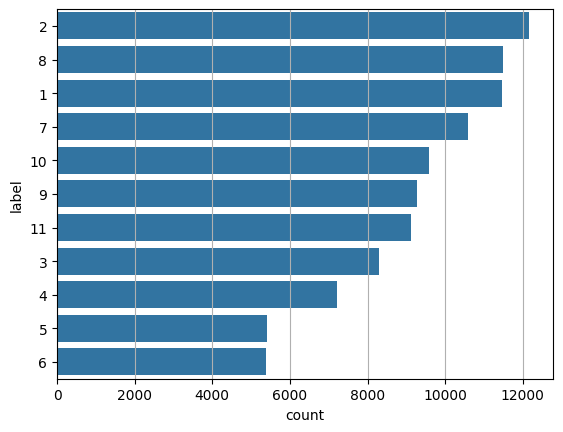

In [ ]:
sns.countplot(y=target, data=data, order=data[target].value_counts().index)
plt.grid(axis='x')
plt.show()

→ 클래스 간 불균형 존재
- 추후 SMOTE ✔️

## 3.EDA

### (1) 단변량 분석

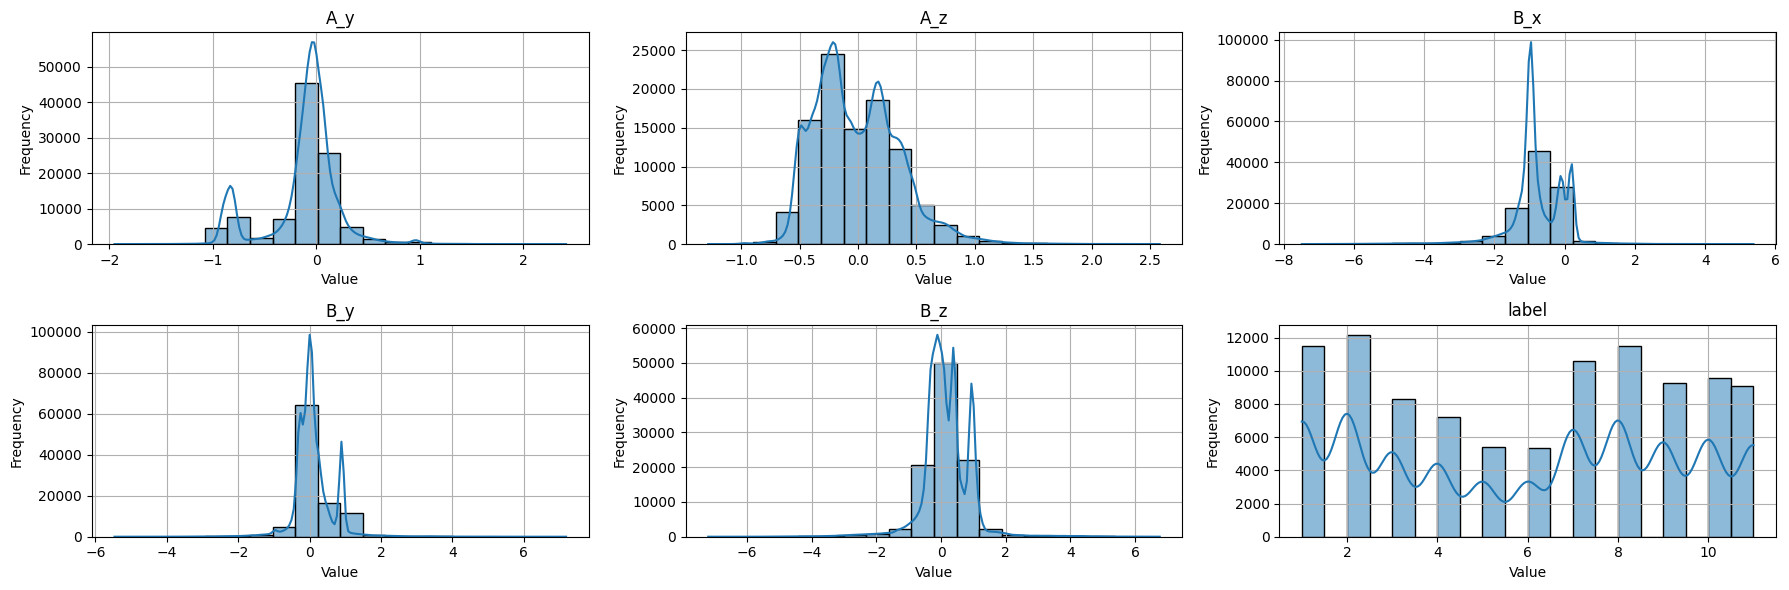

In [ ]:
plt.figure(figsize=(18, 6))

for i, col in enumerate(data.columns[1:7]):
    plt.subplot(2, 3, i+1)
    sns.histplot(data[col], bins=20, alpha=0.5, kde=True)
    plt.title(col)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.grid(True)

plt.tight_layout()
plt.show()

★ TODO: tsne

### (2) 이변량 분석

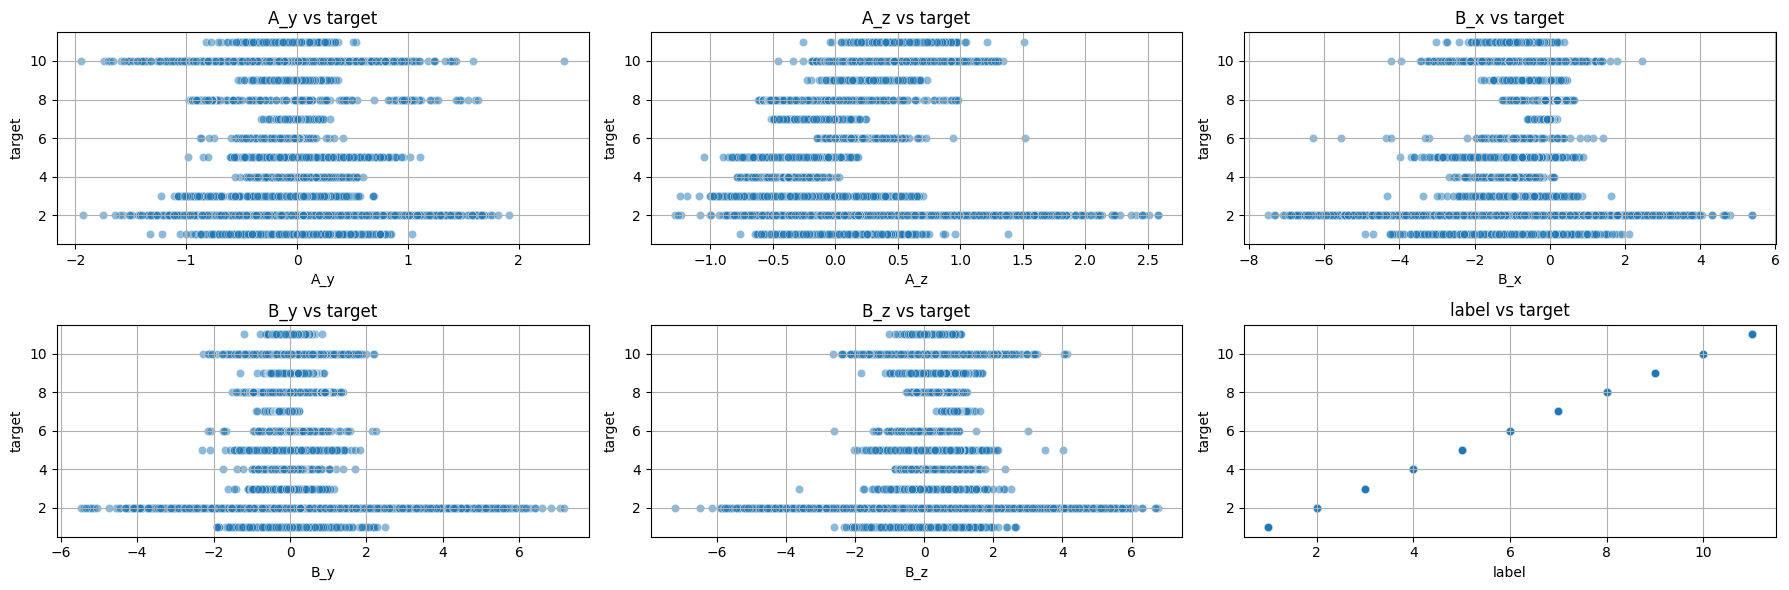

In [ ]:
plt.figure(figsize=(18, 6))

for i, col in enumerate(data.columns[1:7]):
    plt.subplot(2, 3, i+1)
    sns.scatterplot(x=data[col], y=data[target], alpha=0.5)
    plt.title(f'{col} vs target')
    plt.xlabel(col)
    plt.ylabel('target')
    plt.grid(True)

plt.tight_layout()
plt.show()

## 4.전처리

### (1) 데이터 분할 : x, y

In [ ]:
x = data.drop(target, axis=1)
y = data.loc[:, target]
x.head(5)

,A_x,A_y,A_z,B_x,B_y,B_z,serial_number
0,-0.259130,-0.834869,-0.485499,0.196409,0.819567,0.384934,1547253954450000000
1,0.370490,0.175042,0.122625,-0.338242,0.358245,0.126491,946690626440000000
2,-0.257837,-0.881947,-0.391895,0.196027,0.894537,0.411221,1547253933900000000
3,-0.937753,-0.055961,0.362041,-0.929881,0.087673,0.134609,946687582680000000
4,-0.988320,-0.190390,0.157909,-0.954669,-0.024810,-0.388420,946687796620000000


### (2) Min-Max 스케일링
- 스케일링 했더니 오히려 성능이 떨어짐.. 레이블이 시간에 영향 많이 받는 데이터라 그런가?

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_x = scaler.fit_transform(x)
scaled_x = pd.DataFrame(scaled_x, columns=x.columns)

In [ ]:
scaled_x

,A_x,A_y,A_z,B_x,B_y,B_z,serial_number
0,0.698015,0.255420,0.206567,0.597370,0.496982,0.543347,9.999924e-01
1,0.788189,0.486882,0.363736,0.555782,0.460511,0.524853,9.701457e-06
2,0.698200,0.244630,0.230758,0.597341,0.502909,0.545228,9.999924e-01
3,0.600822,0.433938,0.425613,0.509761,0.439121,0.525434,4.633370e-06
4,0.593580,0.403128,0.372856,0.507832,0.430228,0.488008,4.989596e-06
...,...,...,...,...,...,...,...
99995,0.663580,0.449543,0.426571,0.497780,0.429005,0.502891,2.583030e-06
99996,0.602054,0.459161,0.238360,0.508105,0.428460,0.491171,9.779182e-06
99997,0.600482,0.377560,0.387638,0.505610,0.431265,0.503018,1.032679e-07
99998,0.570009,0.412417,0.139239,0.508583,0.377909,0.538521,3.188551e-06


### (3) 클래스 불균형 - SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
# SMOTE : 많은쪽은 그대로(혹은 약간 down sampling), 적은쪽은 보간법!
smote = SMOTE(random_state = 1)
x_sm, y_sm = smote.fit_resample(x, y)

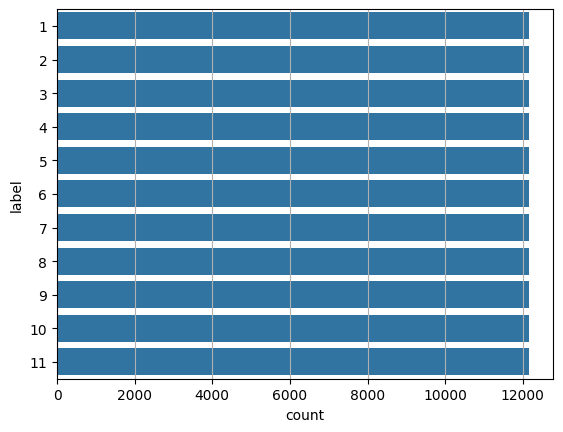

In [ ]:
sns.countplot(y=y_sm, data=data)
plt.grid(axis='x')
plt.show()

### (4) 데이터 분할: train, val

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_sm, y_sm, test_size=.3, random_state=1)

## 5.모델링

In [ ]:
from sklearn.metrics import *
from sklearn.model_selection import cross_val_score, GridSearchCV

#### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=1)
model.fit(x_train, y_train)

y_pred = model.predict(x_val)

In [ ]:
print('accuracy :',accuracy_score(y_val, y_pred))
print('='*60)
print(confusion_matrix(y_val, y_pred))
print('='*60)
print(classification_report(y_val, y_pred))

accuracy : 0.9695226712482259
[[3400   65   24   50   35    2    0    0    0   29   12]
 [  79 3486    2    0    6    1    0    0    0   62    7]
 [  38    9 3087  139  273    0    0    0    0    1    0]
 [  18    1   38 3538    9    0    0    0    0    0    0]
 [  35    3   33   11 3536    0    0    0    0    0    0]
 [  18    6    0    0    0 3662    0    0    0   29    4]
 [   0    0    0    0    0    0 3702    0    0    0    0]
 [   0    0    1    0    1    0    0 3691    0    0    0]
 [   0    0    0    0    0    0    0    0 3663    0    0]
 [  11   28    0    0    0    3    0    0    0 3597   69]
 [   5    0    0    0    0    1    0    0    0   66 3575]]
              precision    recall  f1-score   support

           1       0.94      0.94      0.94      3617
           2       0.97      0.96      0.96      3643
           3       0.97      0.87      0.92      3547
           4       0.95      0.98      0.96      3604
           5       0.92      0.98      0.95      3618
      

In [ ]:
# 성능 예측
cv_score = cross_val_score(model, x_train.values, y_train, cv=10, scoring='accuracy')

In [ ]:
# 결과 확인
print(cv_score)
print(cv_score.mean())

[0.96691922 0.97140113 0.96457155 0.96926689 0.96948031 0.96659908
 0.96916018 0.96702593 0.96617223 0.96776948]
0.96783659982368


#### XGBoost

In [ ]:
# from xgboost import XGBClassifier
# # 레이블 인코딩 위해 레이블 1-11을 0-10으로
# y_train_le = y_train-1
# y_val_le = y_val-1

# model = XGBClassifier(random_state=1)
# param_grid = {
#     'n_estimators': [50, 100, 150],  # Number of boosting rounds
#     'learning_rate': [0.01, 0.03, 0.05, 0.1],  # Step size shrinkage used in update to prevent overfitting
#     'max_depth': [4, 8, 16],  # Maximum depth of a tree
#     'min_child_weight': [1, 2, 3],  # Minimum sum of instance weight (hessian) needed in a child
#     #'gamma': [0, 0.1, 0.2],  # Minimum loss reduction required to make a further partition on a leaf node of the tree
#     #'subsample': [0.6, 0.8, 1.0],  # Subsample ratio of the training instances
#     #'colsample_bytree': [0.6, 0.8, 1.0],  # Subsample ratio of columns when constructing each tree
# }

# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)
# grid_result = grid_search.fit(x_train.values, y_train_le)

# best_model = grid_result.best_estimator_
# y_pred = best_model.predict(x_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [ ]:
# best_params = grid_result.best_params_
# print("Best Parameters:", best_params)

In [ ]:
from xgboost import XGBClassifier
# 레이블 인코딩 위해 레이블 1-11을 0-10으로
y_train_le = y_train-1
y_val_le = y_val-1

model = XGBClassifier(random_state=1)
model.fit(x_train.values, y_train_le)

y_pred = model.predict(x_val)

In [ ]:
print('accuracy :',accuracy_score(y_val_le, y_pred))
print('='*60)
print(confusion_matrix(y_val_le, y_pred))
print('='*60)
print(classification_report(y_val_le, y_pred))

accuracy : 0.9785114912477278
[[3470   38   19   36   24    8    0    0    0   16    6]
 [  36 3576    2    0    0    0    0    0    0   26    3]
 [  25    1 3147  139  234    0    0    0    0    1    0]
 [  15    1   36 3552    0    0    0    0    0    0    0]
 [  16    0   51    0 3551    0    0    0    0    0    0]
 [  16    0    0    0    0 3686    0    0    0   17    0]
 [   0    0    0    0    0    0 3702    0    0    0    0]
 [   0    0    0    0    0    0    0 3693    0    0    0]
 [   0    0    0    0    0    0    0    0 3663    0    0]
 [  11   10    0    0    0    3    0    0    0 3647   37]
 [   6    3    0    0    1    1    0    0    0   25 3611]]
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      3617
           1       0.99      0.98      0.98      3643
           2       0.97      0.89      0.93      3547
           3       0.95      0.99      0.97      3604
           4       0.93      0.98      0.96      3618
      

In [ ]:
# 성능 예측
cv_score = cross_val_score(model, x_train.values, y_train_le, cv=10, scoring='accuracy')

In [ ]:
# 결과 확인
print(cv_score)
print(cv_score.mean())

[0.97769715 0.98089852 0.97545619 0.97972468 0.97598976 0.97865756
 0.978124   0.97865756 0.97609647 0.97769477]
0.9778996659350181


#### LightGBM

In [ ]:
# # 하이퍼 파라미터 튜닝
# from lightgbm import LGBMClassifier

# model = LGBMClassifier(random_state=1, verbose = -1)

# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'learning_rate': [0.01, 0.05, 0.1],
#     'max_depth': [3, 5, 7],
#     'min_child_samples': [10, 20, 30],
# }

# # Grid search with cross-validation
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)
# grid_result = grid_search.fit(x_train.values, y_train_le)

# # Predict on validation set with best model
# best_model = grid_result.best_estimator_
# y_pred = best_model.predict(x_val)

# model.fit(x_train.values, y_train)

# y_pred = model.predict(x_val)

In [ ]:
# best_params = grid_result.best_params_
# print("Best Parameters:", best_params)

In [ ]:
# 하이퍼 파라미터 튜닝 없이
from lightgbm import LGBMClassifier

model = LGBMClassifier(random_state=1, n_estimators=390, min_child_samples= 28, verbose = -1)
model.fit(x_train, y_train)

y_pred = model.predict(x_val)

In [ ]:
print('accuracy :',accuracy_score(y_val, y_pred))
print('='*60)
print(confusion_matrix(y_val, y_pred))
print('='*60)
print(classification_report(y_val, y_pred))

accuracy : 0.9905131844326586
[[3532   33    8   22    0    9    0    0    0    9    4]
 [  10 3620    0    0    0    0    0    0    0   10    3]
 [   8    2 3367   75   95    0    0    0    0    0    0]
 [   5    1    5 3593    0    0    0    0    0    0    0]
 [   0    0   20    0 3598    0    0    0    0    0    0]
 [   9    0    0    0    0 3708    0    0    0    2    0]
 [   0    0    0    0    0    0 3702    0    0    0    0]
 [   0    0    0    0    0    0    0 3693    0    0    0]
 [   0    0    0    0    0    0    0    0 3663    0    0]
 [   4    4    0    0    0    2    0    0    0 3679   19]
 [   2    3    0    0    0    0    0    0    0   17 3625]]
              precision    recall  f1-score   support

           1       0.99      0.98      0.98      3617
           2       0.99      0.99      0.99      3643
           3       0.99      0.95      0.97      3547
           4       0.97      1.00      0.99      3604
           5       0.97      0.99      0.98      3618
      

In [ ]:
# 성능 예측
cv_score = cross_val_score(model, x_train.values, y_train, cv=10, scoring='accuracy')

In [ ]:
# 결과 확인
print(cv_score)
print(cv_score.mean())

In [ ]:
model.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'num_leaves': 31,
 'objective': None,
 'random_state': 1,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0,
 'verbose': -1}

#### 부록) 딥러닝 (실행X)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.backend import clear_session
from keras.optimizers import Adam

In [ ]:
y_train_d = y_train-1

In [ ]:
y_train_d

118584     5
25804      0
102052     2
2157       2
79076      7
          ..
73349      7
109259     3
50057      4
5192      10
128037     8
Name: label, Length: 93709, dtype: int64

In [ ]:
# 하이퍼 파라미터 튜닝 없이
clear_session()

model = Sequential([ Dense( 64, input_shape = (n ,), activation = 'relu'),
                      Dense( 32, activation = 'relu'),
                      Dense( 16, activation = 'relu'),
                      Dense( 11, activation = 'softmax')])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                512       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 11)                187       
                                                                 
Total params: 3307 (12.92 KB)
Trainable params: 3307 (12.92 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile( optimizer=Adam(learning_rate= 0.005), loss ='sparse_categorical_crossentropy')
hist = model.fit(x_train, y_train_d, epochs = 30, validation_split=.3, verbose=2).history

Epoch 1/30
2050/2050 - 12s - loss: 2.3985 - val_loss: 2.4004 - 12s/epoch - 6ms/step
Epoch 2/30
2050/2050 - 4s - loss: 2.3985 - val_loss: 2.3983 - 4s/epoch - 2ms/step
Epoch 3/30
2050/2050 - 5s - loss: 2.3987 - val_loss: 2.3983 - 5s/epoch - 3ms/step
Epoch 4/30
2050/2050 - 4s - loss: 2.3986 - val_loss: 2.3980 - 4s/epoch - 2ms/step
Epoch 5/30
2050/2050 - 4s - loss: 2.3984 - val_loss: 2.3990 - 4s/epoch - 2ms/step
Epoch 6/30
2050/2050 - 5s - loss: 2.3985 - val_loss: 2.3992 - 5s/epoch - 3ms/step
Epoch 7/30
2050/2050 - 4s - loss: 2.3986 - val_loss: 2.3987 - 4s/epoch - 2ms/step
Epoch 8/30
2050/2050 - 6s - loss: 2.3986 - val_loss: 2.3991 - 6s/epoch - 3ms/step
Epoch 9/30
2050/2050 - 4s - loss: 2.3985 - val_loss: 2.3984 - 4s/epoch - 2ms/step
Epoch 10/30
2050/2050 - 4s - loss: 2.3986 - val_loss: 2.3994 - 4s/epoch - 2ms/step
Epoch 11/30
2050/2050 - 6s - loss: 2.3987 - val_loss: 2.3986 - 6s/epoch - 3ms/step
Epoch 12/30
2050/2050 - 4s - loss: 2.3986 - val_loss: 2.3986 - 4s/epoch - 2ms/step
Epoch 13/30

In [ ]:
def dl_history_plot(history):
  plt.figure(figsize=(10,6))
  plt.plot(history['loss'], label='train_err', marker='.')
  plt.plot(history['val_loss'], label='val_err', marker='.')

  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend()
  plt.grid()
  plt.show()

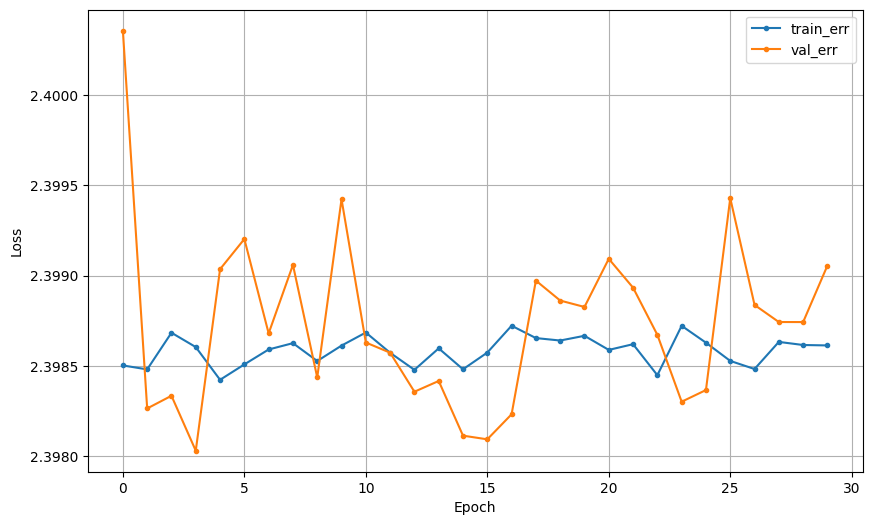

In [ ]:
dl_history_plot(hist)

In [ ]:
y_pred = model.predict(x_val)
y_pred = np.argmax(y_pred, axis=1)

1256/1256 [==============================] - 4s 3ms/step


In [ ]:
y_pred

In [ ]:
print('accuracy :',accuracy_score(y_val, y_pred))
print('='*60)
print(confusion_matrix(y_val, y_pred))
print('='*60)
print(classification_report(y_val, y_pred))

## 6.테스트 데이터 예측

### (1) 모델 저장 및 불러오기

In [ ]:
test_data = pd.read_csv('/content/drive/MyDrive/KT Aivle/Mini Project 3/Kaggle/test.csv')

In [ ]:
from joblib import dump, load

In [ ]:
# 가장 성능 좋았던 LightGBM 모델 저장
dump(model, 'model.joblib')

# 모델 불러오기
model = load('model.joblib')

In [ ]:
# 불필요한 첫번째 열(ID) 제거
test_data.drop(test_data.columns[0], axis=1, inplace=True)

In [ ]:
test_data.isnull().sum()

timestamp    0
A_x          0
A_y          0
A_z          0
B_x          0
B_y          0
B_z          0
dtype: int64

In [ ]:
test_data['timestamp'] = pd.to_datetime(test_data['timestamp'])

# 타임스탬프를 모델링에 사용하기 위하여 일련번호로 변환
test_data['serial_number'] = pd.to_datetime(test_data['timestamp']).astype(int)
test_data.drop('timestamp', axis=1, inplace=True)

test_data.head(5)

,A_x,A_y,A_z,B_x,B_y,B_z,serial_number
0,-1.000957,-0.170691,0.124889,-0.979561,0.003150,-0.264673,946684842700000000
1,-0.874830,0.132696,-0.501727,-1.274911,0.045122,0.121270,946686518540000000
2,-1.219112,0.074678,0.435331,-0.860820,0.222740,0.008689,946685243900000000
3,-0.907752,-0.171816,0.211507,-0.972017,0.337799,1.013534,1547258324580000000
4,-1.031261,0.000340,-0.091693,-0.217434,-0.323466,0.931614,1547254772380000000


In [ ]:
y_pred = model.predict(test_data)
# y_pred = y_pred + 1 (XGBoost 모델일 경우 label encoding한 값에서 원래 레이블로 돌리기 위함)

In [ ]:
# 고유한 값과 각 값이 나타난 횟수 얻기
unique_values, counts = np.unique(y_pred, return_counts=True)

# 결과 출력
print("고유한 값:", unique_values)
print("각 값이 나타난 횟수:", counts)

고유한 값: [ 1  2  3  4  5  6  7  8  9 10 11]
각 값이 나타난 횟수: [1458 1618  993  969  726  703 1406 1540 1192 1366 1263]


In [ ]:
# 데이터프레임 생성
result = pd.DataFrame({'ID': range(len(y_pred)), 'label': y_pred})
result

,ID,label
0,0,6
1,1,4
2,2,10
3,3,9
4,4,7
...,...,...
13229,13229,4
13230,13230,9
13231,13231,4
13232,13232,1


## 7.내보내기

In [ ]:
result.to_csv('a053116_조유빈.csv',index = False)